## Actividad 1
### Uriel Ferro
#### Marzo 2023

### A1 - Ficheros
- Descarga datos mediante la siguiente url https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv
- Imprimir el número de ciudades que tiene el estado de Florida
- Resolver el problema de dos maneras distintas, una usando pandas y otra sin usar ninguna librería (solo Python standard)

#### Solución sin usar ninguna librería (solo Python Standard)


In [16]:
import requests 

url = 'https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv'
response = requests.get(url)

with open('us_cities_states_counties.csv', 'wb') as file:
    file.write(response.content)
    
florida_cities = set()
with open('us_cities_states_counties.csv', 'r') as file:
    next(file)  # saltar la primera línea del encabezado de cada columna
    for line in file:
        fields = line.strip().split('|')
        if fields[2] == 'Florida':
            florida_cities.add(fields[0])  

count = len(florida_cities)  
print(f'Número de ciudades en Florida: {count}')

Número de ciudades en Florida: 537


#### Solución usando Pandas

In [17]:
import requests
import pandas as pd

url = 'https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv'
response = requests.get(url)

with open('us_cities_states_counties.csv', 'wb') as file:
    file.write(response.content)
    
df_cities_states = pd.read_csv('us_cities_states_counties.csv', sep = "|")
#display(df_cities_states)

count_florida_cities = df_cities_states.loc[df_cities_states["State full"] == "Florida", "City"].nunique()
print(f"Número de ciudades en Florida: {count_florida_cities}")

Número de ciudades en Florida: 537


### A2 
- Genera una matriz con valores aleatorios de 0 a 100 de dimensiones 16x16
- Calcula los siguentes estadísticos en la matriz anterior, por fila (el resultado de cada uno debe ser un array de dimensiones 16x1)
  - Suma de los elementos de cada fila
  - Media de los elementos de cada fila
  - Valores mínimos de cada fila
  - Valores máximos de cada fila

#### Genera una matriz con valores aleatorios de 0 a 100 de dimensiones 16x16

In [18]:
import numpy as np

mat = np.random.randint(101, size = (16, 16))
print(mat)

[[ 98  98  36  50  28  46  88  55  11   1  78  99  82  85  95  40]
 [ 90  87  87  46  75  50  21  31   7  76  24  66  21  29  64 100]
 [ 33  53  11  36  59  22  98  88  38  59   7  22  53  30  81  62]
 [ 34   3  19  87  68  68  50   6  49  80  22  79  84   4  52  72]
 [ 48  18  80  51  83  87  29  48  20  20  23   7  50  86  88  51]
 [ 99  33  30  79  88  19  46  87  56  93  96  59   8  54  78  11]
 [ 99  34  97  70  63  53  60  11  70  53  30  10  16  14  28  76]
 [ 15  97  11  51  83  16  85  57  69  32  46  39  68   9   0  51]
 [ 64  39  78  70  62  51  19  29  20  22   3  45  21  43  85  51]
 [ 86  12  21  90  39  90  49  53  34  46  89  67  53  77  64  39]
 [ 52  76  96  99  94  37  60  84  52  60  72  94  27   1  10  91]
 [ 83  14   9  84  95  59  80  66  34  65  25  65  19  69  88  43]
 [ 19   6  27   5  77 100 100  45  25  33  13   4  10  26  74  28]
 [ 76  29  24  99  69   8  14  36  19  59   0  20  25  87   9  65]
 [ 53  55  56  49  27  15  39  98  88  20  20   9  46   9  73 

#### Suma de los elementos de cada fila (el resultado de cada uno debe ser un array de dimensiones 16x1)


In [19]:
suma_filas = np.sum(mat, axis = 1).reshape(16, 1)
print(suma_filas)

[[ 990]
 [ 874]
 [ 752]
 [ 777]
 [ 789]
 [ 936]
 [ 784]
 [ 729]
 [ 702]
 [ 909]
 [1005]
 [ 898]
 [ 592]
 [ 639]
 [ 686]
 [ 710]]


#### Media de los elementos de cada fila (el resultado de cada uno debe ser un array de dimensiones 16x1)

In [96]:
media_filas = np.mean(mat, axis = 1).reshape(16, 1)
print(media_filas)

[[59.375 ]
 [40.5625]
 [55.875 ]
 [57.9375]
 [54.875 ]
 [57.375 ]
 [48.3125]
 [50.1875]
 [43.6875]
 [50.375 ]
 [65.75  ]
 [63.625 ]
 [59.    ]
 [59.375 ]
 [60.5   ]
 [54.6875]]


#### Valores mínimos de cada fila (el resultado de cada uno debe ser un array de dimensiones 16x1)

In [77]:
min_filas = np.min(mat, axis = 1).reshape(16, 1)
print(min_filas)

[[ 4]
 [ 0]
 [ 1]
 [20]
 [ 0]
 [ 5]
 [ 3]
 [ 1]
 [ 2]
 [ 1]
 [15]
 [ 1]
 [12]
 [10]
 [ 0]
 [ 1]]


#### Valores máximos de cada fila (el resultado de cada uno debe ser un array de dimensiones 16x1)

In [95]:
max_filas = np.max(mat, axis = 1).reshape(16, 1)
print(max_filas)

[[ 94]
 [ 88]
 [ 93]
 [ 99]
 [100]
 [ 99]
 [ 93]
 [ 96]
 [ 97]
 [ 96]
 [ 93]
 [ 96]
 [ 89]
 [100]
 [ 99]
 [ 99]]


### A3
- Explica y expón, con un ejemplo propio, el broadcasting de NumPy

Por lo general, NumPy trabaja con operaciones entre matrices en la que se realiza una operación elemento a elemento. 
En el caso más simple, las dos matrices deben tener exactamente la misma dimensión para que la operación pueda realizarse correctamente. 
Pero, en caso de que las matrices no tengan las misma dimensión, entra en juego el Broadcasting.  

El Broadcasting en NumPy es una técnica que permite realizar operaciones entre matrices con diferentes dimensiones. 
NumPy trata de igualar las dimensiones de las matrices para que la operación se pueda llevar a cabo. Esto es posible porque, en muchas ocasiones, 
las matrices que tienen formas diferentes pueden ser compatibles en términos de dimensiones y se pueden expandir para que se puedan aplicar las operaciones.

En el EJEMPLO 1, el broadcasting lo que hace es agregar en el vector_b dos filas mas, con los mismos valores que la fila 0, igualando las dimensiones de la matriz_a 3x3.

En el EJEMPLO 2, el broadcasting lo que hace es ampliar la matriz de 2x1 a una matriz de 2x2 duplicando la segunda columna.
Se amplió la matriz de 2x1 a una matriz de 2x2. Se duplicó la columna de la matriz 2x1
para que pudiera sumarse con la segunda columna de la matriz de 2x2.

Estos son solo ejemplos simples de broadcasting. En general, broadcasting se puede aplicar para realizar operaciones con matrices de diferentes dimensiones, 
siempre que puedan ser compatibles en dimensiones. Esto puede hacer que el código sea más eficiente y fácil de escribir, especialmente cuando se trata de 
matrices grandes y complejas.


In [79]:
import numpy as np 

# EJEMPLO 1
# Definimos una matriz de 3x3
matriz_a = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])

# Definimos un vector de 1x3
vector_b = np.array([1, 2, 3])

# Multiplicamos la matriz por el vector haciendo uso del broadcasting
resultado = matriz_a * vector_b
print(resultado)

print("-------------------------------------------------------")

# EJEMPLO 2
# matriz de 2x2
mat_1 = np.array([[1, 2], 
                [3, 4]])

# matriz de 2x1
mat_2 = np.array([[5], 
                  [6]])

# sumar las dos matrices utilizando el broadcasting
resultado = mat_1 + mat_2

print(resultado)


[[ 1  4  9]
 [ 4 10 18]
 [ 7 16 27]]
-------------------------------------------------------
[[ 6  7]
 [ 9 10]]


### A4 
- Resolución de dos sistemas de ecuaciones
    - $ A : \begin{cases} -9y +  4x = 20 \\ -7y + 16x = 80                         \end{cases}$
    
    - $ B : \begin{cases} x - 2y + 3z = 7 \\ 2x + y + z = 4 \\ -3x + 2y -2z = -10 \end{cases}$

#### Resolución sistema A 

In [5]:
import numpy as np

A = np.array([[4, -9], 
              [16, -7]])

b = np.array([20, 80])

x = np.linalg.solve(A, b)

print("La solución del sistema A de 2x2 es: x =", x[0], ", y =", x[1])

La solución del sistema A de 2x2 es: x = 5.0 , y = -0.0


#### Resolución sistema B

In [6]:
A = np.array([[1, -2, 3], 
              [2, 1, 1],
              [-3, 2, -2]])

b = np.array([7, 4, -10])

x = np.linalg.solve(A, b)

print("La solución del sistema B de 3x3 es: x =", x[0], ", y =", x[1], ", z =", x[2])

La solución del sistema B de 3x3 es: x = 2.0 , y = -0.9999999999999998 , z = 1.0000000000000002


### A5
- Crear un DataFrame de dimensiones 10x10, con números aleatorios en el rango `[0,20]`
- Reemplazar todos aquellos elementos menores de 5 por NaN
- Averiguar cuantos elementos tienen Nan por fila

In [7]:
import pandas as pd
import numpy as np

#### Crear un DataFrame de dimensiones 10x10, con números aleatorios en el rango [0, 20]

In [8]:
data = np.random.randint(0, 21, size = (10, 10))

df_data = pd.DataFrame(data)
display(df_data)

,0,1,2,3,4,5,6,7,8,9
0,9,13,9,16,0,9,0,1,19,2
1,4,2,20,15,0,15,8,4,5,18
2,18,20,11,13,20,20,4,8,13,13
3,12,18,20,20,16,6,5,11,18,11
4,11,16,3,14,12,6,3,8,1,11
5,15,5,19,4,17,17,19,0,17,16
6,8,16,17,5,13,16,17,1,8,17
7,15,20,8,19,8,18,13,15,13,0
8,14,8,18,5,3,7,12,15,11,5
9,6,2,20,0,2,19,12,19,17,6


#### Reemplazar todos aquellos elementos menores de 5 por NaN

In [9]:
df_data = df_data.where(df_data >= 5, np.nan)
display(df_data)

,0,1,2,3,4,5,6,7,8,9
0,9.0,13.0,9.0,16.0,NaN,9,NaN,NaN,19.0,NaN
1,NaN,NaN,20.0,15.0,NaN,15,8.0,NaN,5.0,18.0
2,18.0,20.0,11.0,13.0,20.0,20,NaN,8.0,13.0,13.0
3,12.0,18.0,20.0,20.0,16.0,6,5.0,11.0,18.0,11.0
4,11.0,16.0,NaN,14.0,12.0,6,NaN,8.0,NaN,11.0
5,15.0,5.0,19.0,NaN,17.0,17,19.0,NaN,17.0,16.0
6,8.0,16.0,17.0,5.0,13.0,16,17.0,NaN,8.0,17.0
7,15.0,20.0,8.0,19.0,8.0,18,13.0,15.0,13.0,NaN
8,14.0,8.0,18.0,5.0,NaN,7,12.0,15.0,11.0,5.0
9,6.0,NaN,20.0,NaN,NaN,19,12.0,19.0,17.0,6.0


#### Averiguar cuantos elementos tienen NaN por fila


In [10]:
count_nan_by_row = df_data.isnull().sum(axis = 1)
print(count_nan_by_row)

0    4
1    4
2    1
3    0
4    3
5    2
6    1
7    1
8    1
9    3
dtype: int64


### A6 
- Se tienen tres datasets, se adjuntan sus datos como diccionarios
  - Students, representa un conjunto de alumnos, con sus nombres, edad y sexo
  - Subjects, un conjunto de asignaturas, con su nombre y el semestre en que se imparten
  - Marks, un conjunto de notas que han obtenido los alumnos en las asignaturas
- Obtener la siguiente información usando Pandas
  - El nombre del alumno con la mejor nota, y en que asignatura ha sido
  - Cuantos alumnos tienen asignaturas suspendidas en el primer semestre
  - La media de edad de los asistentes a la asignatura de Python
  - Formar una palabra con las iniciales de los nombres de los estudiantes ordenados por edad
- Representar graficamente
  - Las notas medias de todos los estudiantes por asignatura, agrupando por sexo
  - La densidad bivariable de la edad de los estudiantes frente a sus notas, agrupando por sexo (mostrando los datos de dispersion en la zona central, las curvas de densidad en los ejes)

In [83]:
students = {'StudentId': [1,2,3,4,5,6], 'Name' : ['Yael','Thomas','Paula','Orlando','Hannah','Nicole'], 'Age' : [22,31,19,44,39,51], 'Sex' : ['M', 'M', 'F', 'M', 'F', 'F']}
subjects = {'SubjectId': [1,2,3], 'Name': ['Python', 'Math', 'DeepLearning'], 'Semester': [1, 1, 2]}
marks = {'StudentId' : [2,2,1,3,6,4,4,3,2,5], 'SubjectId' : [1,3,1,2,1,2,3,1,2,1], 'Mark': [6,5,8,3,5,2,7,2,4,6]}

#### Acondicionamiento de los dataframes

In [84]:
import pandas as pd

df_students = pd.DataFrame(students)
#display(df_students)

df_subjects = pd.DataFrame(subjects)
#display(df_subjects)

df_marks = pd.DataFrame(marks)
#display(df_marks)

df_students_marks = pd.merge(df_students, df_marks, on = "StudentId")
#display(df_students_marks)
df_general = pd.merge(df_students_marks, df_subjects, on = "SubjectId")
df_general = df_general.rename(columns = {"Name_x": "Student_name"})
df_general = df_general.rename(columns = {"Name_y": "Subject_name"})
display(df_general)

,StudentId,Student_name,Age,Sex,SubjectId,Mark,Subject_name,Semester
0,1,Yael,22,M,1,8,Python,1
1,2,Thomas,31,M,1,6,Python,1
2,3,Paula,19,F,1,2,Python,1
3,5,Hannah,39,F,1,6,Python,1
4,6,Nicole,51,F,1,5,Python,1
5,2,Thomas,31,M,3,5,DeepLearning,2
6,4,Orlando,44,M,3,7,DeepLearning,2
7,2,Thomas,31,M,2,4,Math,1
8,3,Paula,19,F,2,3,Math,1
9,4,Orlando,44,M,2,2,Math,1


#### El nombre del alumno con la mejor nota, y en que asignatura ha sido


In [85]:
best_mark = df_general.sort_values("Mark", ascending = False).iloc[0]
#display(best_mark)

print(f"El alumno con mejor nota es {best_mark['Student_name']} ({best_mark['Mark']}), en la asignatura {best_mark['Subject_name']}.")

El alumno con mejor nota es Yael (8), en la asignatura Python.


#### Cuantos alumnos tienen asignaturas suspendidas en el primer semestre

In [86]:
df_first_semester = df_general[df_general["Semester"] == 1]
df_failed = df_first_semester[df_first_semester["Mark"] < 5]
#print(df_failed)

count_students_failed = df_failed.groupby("StudentId")["Student_name"].nunique().count()

print(f"Hay {count_students_failed} alumnos que tienen asignaturas repobadas en el primer semestre.")

Hay 3 alumnos que tienen asignaturas repobadas en el primer semestre.


#### La media de edad de los asistentes a la asignatura de Python

In [87]:
df_python_assistants = df_general[df_general["Subject_name"] == "Python"]
#print(df_python_assistants)

avg_age_python_assistants = df_python_assistants["Age"].mean()

print(f"El promedio de edad de los asistentes a la asignatura de Python es de {avg_age_python_assistants} años.")

El promedio de edad de los asistentes a la asignatura de Python es de 32.4 años.


#### Formar una palabra con las iniciales de los nombres de los estudiantes ordenados por edad

In [88]:
name_ordered_by_age = df_general.sort_values("Age", ascending = True)
#print(name_ordered_by_age)
initials_letters = name_ordered_by_age["Student_name"].str[0].unique()
#print(initials_letters)

word_formed_with_initials = "".join(initials_letters)

print(f"La palabra que se forma con las iniciales de los estudiantes ordenados por edad es: {word_formed_with_initials}")

La palabra que se forma con las iniciales de los estudiantes ordenados por edad es: PYTHON


#### Representar graficamente las notas medias de todos los estudiantes por asignatura, agrupando por sexo.

  Sex  Subject_name      Mark
0   F          Math  3.000000
1   F        Python  4.333333
2   M  DeepLearning  6.000000
3   M          Math  3.000000
4   M        Python  7.000000


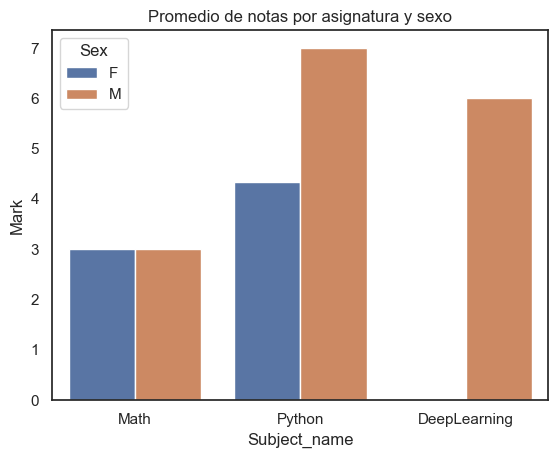

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

df_mean_marks_by_sex = df_general.groupby(['Sex', 'Subject_name'])['Mark'].mean().reset_index() # La función reset_index() se utiliza para convertir los índices de las filas del DataFrame en columnas.
print(df_mean_marks_by_sex)

sns.barplot(x = 'Subject_name', y = 'Mark', hue = 'Sex', data = df_mean_marks_by_sex)
plt.title("Promedio de notas por asignatura y sexo")
plt.show()

#### La densidad bivariable de la edad de los estudiantes frente a sus notas, agrupando por sexo (mostrando los datos de dispersion en la zona central, las curvas de densidad en los ejes)

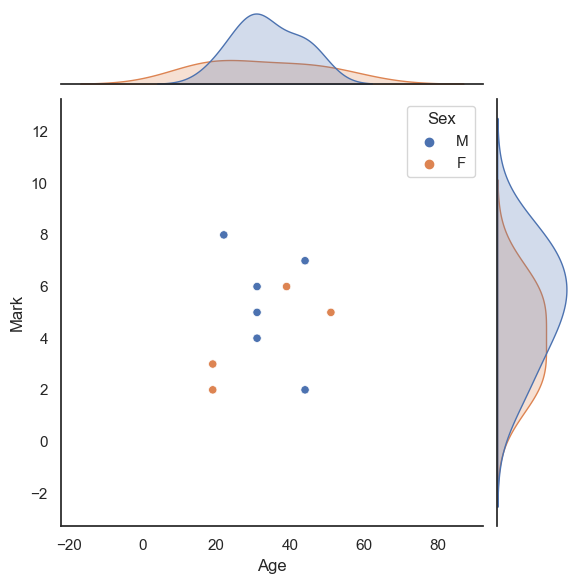

In [91]:
sns.jointplot(df_general, x = 'Age', y = 'Mark', hue = 'Sex')
plt.show()

### A7 
- Dadas dos Series de Pandas, implementar una función 'find_not_common' para encontrar los elementos no comunes a ambas Series
- Se proveen dos series como referencia, el resultado para este ejemplo debe ser una serie con los elementos [4, 6, 14, 16]

In [13]:
import pandas as pd

p1 = pd.Series([2, 4, 12, 6, 8, 10])
p2 = pd.Series([8, 10, 12, 10, 14, 2, 16, 10])

#### Creación de la función "find_not_common"

In [14]:
def find_not_common(p1, p2):
    p1_p2_concatenated = pd.concat([p1, p2])
    number_of_occurrences_per_element = p1_p2_concatenated.value_counts()
    not_common = number_of_occurrences_per_element[number_of_occurrences_per_element == 1]
    return pd.Series(not_common.index)

#### Testeo

In [15]:
print(find_not_common(p1, p2).equals(pd.Series([4, 6, 14, 16]))) # Esto deberia imprimir True

True
